1. Setup

In [1]:
apikey = '################################################################'
secret = '################################################################'

In [ ]:
%pip install python-binance pandas mplfinance

In [5]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

2. Authenticate

In [6]:
client = Client(apikey, secret)

3. Get Tickers

In [ ]:
tickers = client.get_all_tickers()

In [17]:
ticker_df = pd.DataFrame(tickers)

In [18]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.07602100
1,LTCBTC,0.00319000
2,BNBBTC,0.01077200
3,NEOBTC,0.00057500
4,QTUMETH,0.00249200


In [19]:
ticker_df.tail()

,symbol,price
1880,ETHUST,3167.48000000
1881,GALAAUD,0.48807000
1882,LRCBNB,0.00383400
1883,ONEETH,0.00009238
1884,OOKIBNB,0.00006543


In [ ]:
#assigns 'symbol' field to be the index

ticker_df.set_index('symbol', inplace=True)

4. Get Depth

In [29]:
depth = client.get_order_book(symbol='BTCUSDT')

In [36]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price', "Volume"]
depth_df.head()

,Price,Volume
0,41769.87000000,0.47101000
1,41768.66000000,0.07875000
2,41766.57000000,0.00047000
3,41765.60000000,0.08900000
4,41763.21000000,0.07659000


5. Get Historical Data

In [54]:
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [56]:
hist_df = pd.DataFrame(historical)

In [59]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker by Base Asset Volume', 'Taker by Quote Asset Volume', 'Ignore']

In [60]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker by Base Asset Volume,Taker by Quote Asset Volume,Ignore
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,8733.91139481
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,9384.14140858
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,9184.08552906
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,10125.41408414
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,11706.76997007


In [62]:
hist_df.shape

(1605, 12)

6. Preprocess Historical Data

In [64]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [73]:
hist_df.dtypes

Open Time                      datetime64[ns]
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Volume                                float64
Close Time                     datetime64[ns]
Quote Asset Volume                    float64
Number of Trades                        int64
Taker by Base Asset Volume            float64
Taker by Quote Asset Volume           float64
Ignore                                 object
dtype: object

In [70]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume','Taker by Base Asset Volume', 'Taker by Quote Asset Volume']

In [72]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [75]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker by Base Asset Volume,Taker by Quote Asset Volume
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1.605000e+03,1.605000e+03,1605.000000,1.605000e+03
mean,17525.926399,18051.999059,16923.741090,17549.452336,50296.913545,1.044292e+09,7.569081e+05,25048.287240,5.160129e+08
std,17335.032944,17836.226243,16749.175768,17342.602866,36289.341348,1.399223e+09,7.563052e+05,17628.803163,6.853819e+08
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03,56.190141,2.413638e+05
25%,6737.270000,6900.000000,6568.000000,6740.890000,28451.969138,2.152837e+08,2.138970e+05,14470.444269,1.127035e+08
50%,9294.690000,9473.010000,9093.010000,9296.490000,43408.475616,4.177245e+08,4.465580e+05,21666.536951,2.078037e+08
75%,18764.960000,19342.000000,18184.990000,18808.690000,64566.421908,1.409783e+09,1.114294e+06,31905.316420,6.883522e+08
max,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764,1.347769e+10,6.331062e+06,197511.954273,6.410033e+09


In [78]:
hist_df.describe(include='datetime64[ns]')

C:\Users\gmccu\AppData\Local\Temp/ipykernel_10568/2996143359.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hist_df.describe(include='datetime64[ns]')


,Open Time,Close Time
count,1605,1605
unique,1605,1605
top,2017-08-17 00:00:00,2017-08-17 23:59:59.999000064
freq,1,1
first,2017-08-17 00:00:00,2017-08-17 23:59:59.999000064
last,2022-01-07 00:00:00,2022-01-07 23:59:59.999000064


In [79]:
hist_df.describe(include='object')

,Ignore
count,1605
unique,124
top,0
freq,1482


In [77]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Open Time                    1605 non-null   datetime64[ns]
 1   Open                         1605 non-null   float64       
 2   High                         1605 non-null   float64       
 3   Low                          1605 non-null   float64       
 4   Close                        1605 non-null   float64       
 5   Volume                       1605 non-null   float64       
 6   Close Time                   1605 non-null   datetime64[ns]
 7   Quote Asset Volume           1605 non-null   float64       
 8   Number of Trades             1605 non-null   int64         
 9   Taker by Base Asset Volume   1605 non-null   float64       
 10  Taker by Quote Asset Volume  1605 non-null   float64       
 11  Ignore                       1605 non-null 

7. Viz

In [80]:
import mplfinance as mpf

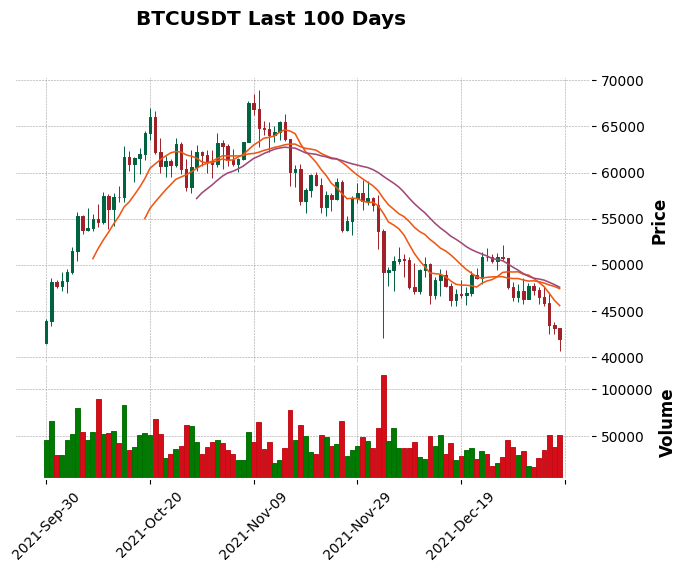

In [86]:
mpf.plot(hist_df.set_index('Close Time').tail(100),
    type='candle', style='charles',
    volume = True,
    title='BTCUSDT Last 100 Days',
    mav=(10,20,30))